In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
%matplotlib inline
GOLDEN_RATIO = 0.5*(1. + np.sqrt(5))

In [2]:
sim = rebound.Simulation()

In [3]:
ifile = 'init.txt'
f = open(ifile, 'r')
data = f.read()
sim.add_particles_ascii(data)
f.close()

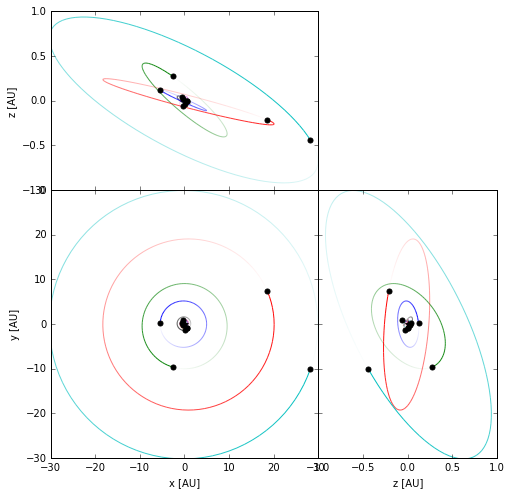

In [4]:
# plot initial orbit before integration
fig = rebound.OrbitPlot(sim, slices=True, trails=True, color=True, unitlabel="[AU]", lim=30, limz=1)
plt.show()

In [5]:
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1

# near the close encounter
t_encounter = 111425.739282 # from init (in hour)
to_year = 1./(365.25*24)
half_delta_t = 5
start = (t_encounter - half_delta_t)*to_year
end = (t_encounter + half_delta_t)*to_year
times = np.linspace(start*year,end*year, Noutputs)

# to save the data of the Earth, Moon, and Apophis
earth = np.zeros((Noutputs, 9))
moon = np.zeros((Noutputs, 9))
apoph = np.zeros((Noutputs, 9))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.dt = 0.001           # unit?
sim.move_to_com()        # We always move to the center of momentum frame before an integration

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i, time in enumerate(times):
    sim.integrate(time)
    earth[i,:] = [ps[3].x, ps[3].y, ps[3].z, ps[3].vx, ps[3].vy, ps[3].vz, ps[3].a, ps[3].e, ps[3].inc]
    moon[i,:] = [ps[4].x, ps[4].y, ps[4].z, ps[4].vx, ps[4].vy, ps[4].vz, ps[4].a, ps[4].e, ps[4].inc] # aei moon is calculated relative to the Sun (NOT Earth)
    apoph[i,:] = [ps[10].x, ps[10].y, ps[10].z, ps[10].vx, ps[10].vy, ps[10].vz, ps[10].a, ps[10].e, ps[10].inc]

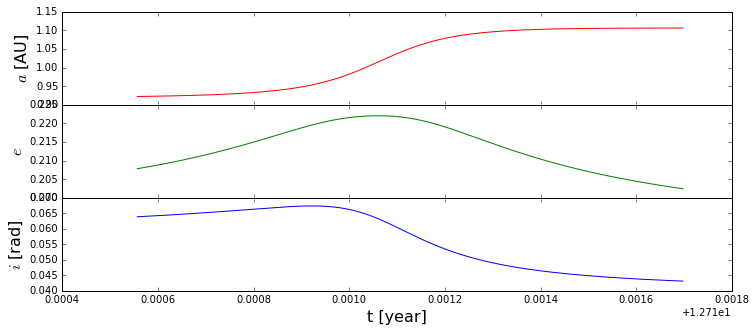

In [6]:
aei = apoph[:,6:]
t = times/year

nRow = 3
xSize = 12
ySize = float(nRow)*xSize/GOLDEN_RATIO
color = ['r', 'g', 'b']

# ymin = [0.8, 0.17, 0.030]
# ymax = [1.2, 0.21, 0.070]
# startY = [0.0, 0.0, 0.0]
# delY = [0.1, 0.01, 0.01]
# delMY = [0.05, 0.005, 0.005]

# xmin = 0.0
# xmax = 100.0
# startX = xmin
# delX = 10.0
# delMX = 2.0
ylabel = [r'$a$ [AU]', r'$e$', r'$i$ [rad]']

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nRow, 1, wspace=0, hspace=0)
#xticks = np.arange(startX, xmax+1.e-3*delX, delX)
for i in range(nRow):
    ax = plt.subplot(gs[i])
    ax.plot(t, aei[:,i], color[i])
    
#     ax.set_xticks(xticks)
#     ax.set_xlim(xmin, xmax)
#     minorLocator_x = MultipleLocator(delMX)
#     ax.xaxis.set_minor_locator(minorLocator_x)
   
#     if i == 0:
#         yticks = np.arange(startY[i], ymax[i]+1.e-3*delY[i], delY[i])
#         ax.set_yticks(yticks)
#     else:
#         yticks = np.arange(startY[i], ymax[i]-1.e-3*delY[i], delY[i])
#         ax.set_yticks(yticks)
#     minorLocator_y = MultipleLocator(delMY[i])
#     ax.yaxis.set_minor_locator(minorLocator_y)
#     ax.set_ylim(ymin[i], ymax[i])
    
    if (i<(nRow-1)):
        ax.set_xticklabels('')
    if (i==(nRow-1)):
        ax.set_xlabel('t [year]', fontsize=16)
    ax.set_ylabel(ylabel[i], fontsize=16)

plt.show()

Minimum distance (0.099612 AU) occured at time: 12.711059 years.


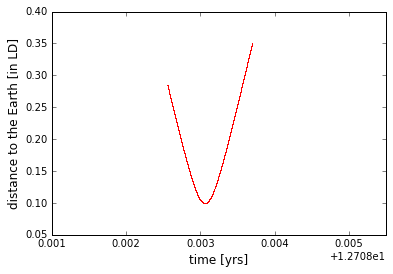

In [7]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(111)

lunar = 389.177939646 # au in lunar distance
distance = np.sqrt(np.sum(np.square(earth[:,:3] - apoph[:,:3]), axis=1))*lunar

ax.scatter(t, distance, c='r', s=1, lw=0)
ax.set_xlabel("time [yrs]", fontsize=12)
ax.set_ylabel("distance to the Earth [in LD]", fontsize=12)

closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance), closeencountertime))

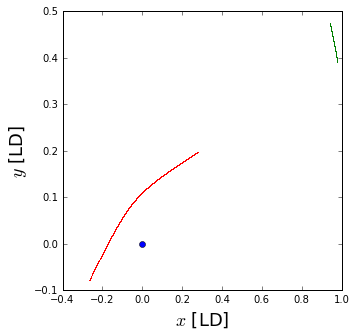

In [8]:
# relative to the Earth in Lunar Distance (LD)
relpos_apo = (apoph[:,:3] - earth[:,:3])*lunar
relpos_moo = (moon[:,:3] - earth[:,:3])*lunar

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot([0], [0], 'o', relpos_moo[:,0], relpos_moo[:,1], 'g,', relpos_apo[:,0], relpos_apo[:,1], 'r,')
ax.set_xlabel(r'$x$ [LD]', fontsize=18)
ax.set_ylabel(r'$y$ [LD]', fontsize=18)

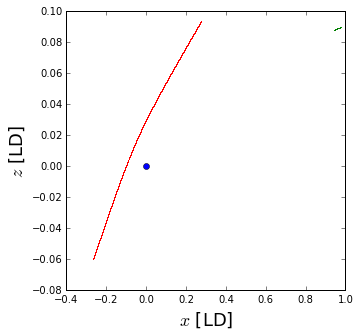

In [9]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot([0], [0], 'o', relpos_moo[:,0], relpos_moo[:,2], 'g,', relpos_apo[:,0], relpos_apo[:,2], 'r,')
ax.set_xlabel(r'$x$ [LD]', fontsize=18)
ax.set_ylabel(r'$z$ [LD]', fontsize=18)

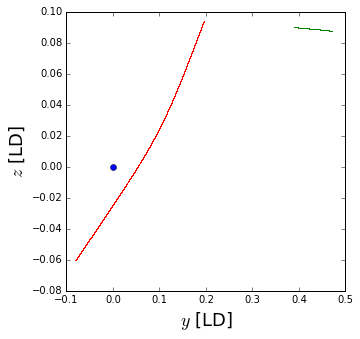

In [10]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.plot([0], [0], 'o', relpos_moo[:,1], relpos_moo[:,2], 'g,', relpos_apo[:,1], relpos_apo[:,2], 'r,')
ax.set_xlabel(r'$y$ [LD]', fontsize=18)
ax.set_ylabel(r'$z$ [LD]', fontsize=18)

(-1, 1)

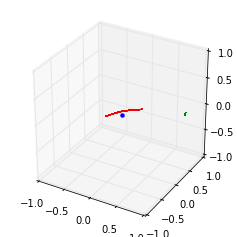

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
rmax = (-1, 1)

ax.scatter([0], [0], [0], c='b', s=20, lw=0) 
ax.scatter(relpos_moo[:,0], relpos_moo[:,1], relpos_moo[:,2], c='g', s=1, lw=0)
ax.scatter(relpos_apo[:,0], relpos_apo[:,1], relpos_apo[:,2], c='r', s=1, lw=0)
ax.set_xlim(rmax); ax.set_ylim(rmax); ax.set_zlim(rmax)